# Titanic Survival Prediction

In the Titanic survival project, I managed missing data, preprocessed variables, and scaled features, ensuring a complete dataset. After training and evaluating the machine learning model, I gained insights, enabling accurate predictions about passengers' survival, optimizing performance through meticulous analysis.

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
titanic = pd.read_csv(r"C:\Users\NIMA\Downloads\tested.csv")

# Display the first few rows of the dataset
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [64]:
cols=list(titanic.columns)
print(cols)

['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


C:\Users\NIMA\AppData\Local\Temp\ipykernel_4184\4198022266.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = titanic.corr()


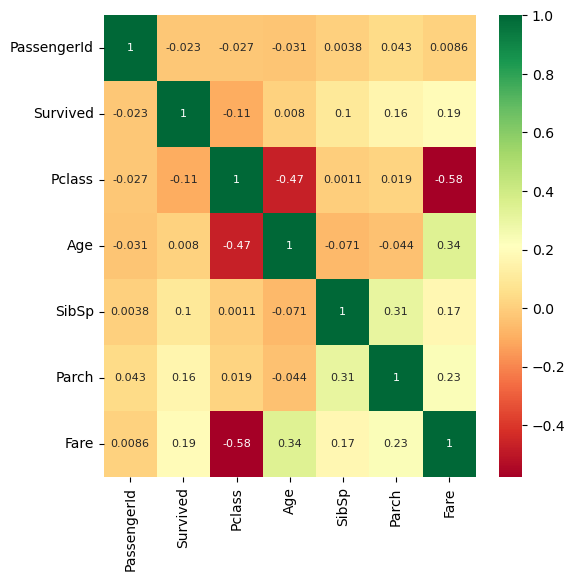

In [65]:
#get correlations of each features in dataset  (checking the correlation[relation] of the feautures with the label(output[0:1]))
corrmat = titanic.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(6,6))
#plot heat map
sns.heatmap(data_1[top_corr_features].corr(),annot=True,cmap="RdYlGn", annot_kws={"fontsize": 8});

In [66]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [67]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


# Data Preprocessing


In [68]:
# Handle missing values

# Fill missing Age and Fare with their respective medians
titanic['Age'].fillna(titanic['Age'].median(), inplace=True)
titanic['Fare'].fillna(titanic['Fare'].median(), inplace=True)

# Drop the Cabin column
titanic.drop('Cabin', axis=1, inplace=True)

# Model Training and Evaluation

In [69]:
from sklearn.model_selection import train_test_split

# Splitting the data into features (X) and target variable (y)
X = titanic.drop('Survived', axis=1)
y = titanic['Survived']

# Splitting the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [71]:
#let's see the values that sruvived are 0
count0=titanic['Survived'][titanic.Survived==0].count()
count0

266

In [18]:
X_train.shape

(334, 8)

#from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

#Initialize and train a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

#Predict the survival on the test set
y_pred = rf_classifier.predict(X_test)

#Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

accuracy, classification_rep

In [20]:
from sklearn.tree import DecisionTreeClassifier

# Create Decision Tree Classifier object
dpth=4
model= DecisionTreeClassifier(criterion='entropy', max_depth=dpth)

In [21]:
#Train Classifier
model=model.fit(X_train,y_train)

In [22]:
#Predict the response for each test datasets
y_pred = model.predict(X_test)

In [23]:
# Comparing outcomes of Original dataset and the outcome(prediction) of the model
C= pd.DataFrame({'Original': y_test,'Predicted': y_pred})
C

,Original,Predicted
321,0,0
324,1,1
388,0,0
56,0,0
153,1,1
...,...,...
57,0,0
126,0,0
24,1,1
17,0,0


# Missing Data

In [72]:
titanic.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
413,False,False,False,False,False,False,False,False,False,False,False
414,False,False,False,False,False,False,False,False,False,False,False
415,False,False,False,False,False,False,False,False,False,False,False
416,False,False,False,False,False,False,False,False,False,False,False


<Axes: xlabel='Survived', ylabel='count'>

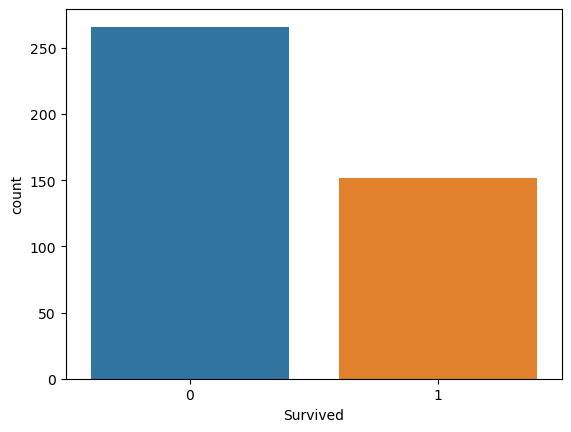

In [73]:
sns.countplot(x='Survived',data=titanic)

<Axes: xlabel='Survived', ylabel='count'>

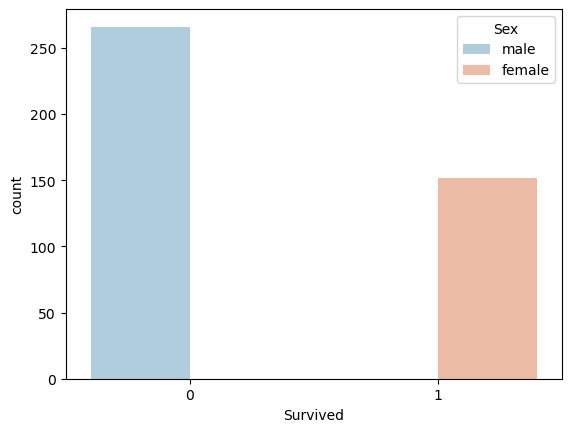

In [74]:
sns.countplot(x='Survived',hue='Sex',data=titanic,palette='RdBu_r')

<Axes: >

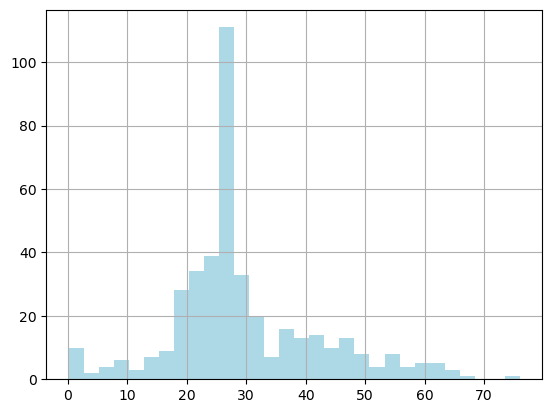

In [75]:
titanic['Age'].hist(bins=30,color='lightblue')

<Axes: >

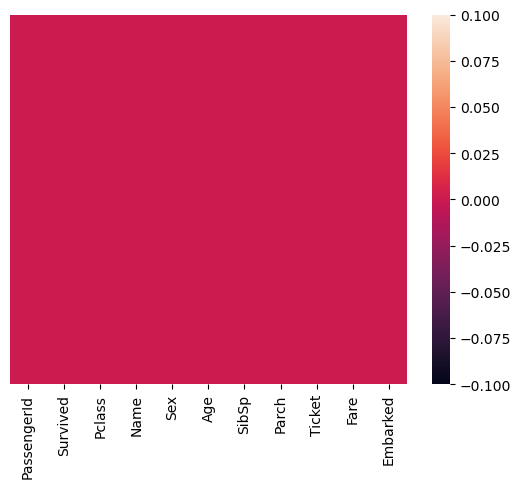

In [76]:
sns.heatmap(titanic.isnull(),yticklabels=False)